#**Izaz Khan**
**Reg. No:** B23F0001AI029  
**Section:** AI Green  
**Course:** ML OEL

**Date:** 11/12/2025

#**The basic libraries to import for the Task**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Standard ML imports we will need later
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Upload the dataset
print("Please upload 'machine_failure_data.csv'")
uploaded = files.upload()

Please upload 'machine_failure_data.csv'


Saving machine_failure_data.csv to machine_failure_data.csv


#**Load Data into DataFrame**

In [ ]:
import io

# Get the filename from the uploaded dictionary
filename = next(iter(uploaded))

# Load into Pandas
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display first few rows to verify
df.head()

,Machine_ID,Timestamp,Temperature,Pressure,Vibration_Level,Humidity,Power_Consumption,Failure_Status
0,MACHINE_001,2025-01-01 00:00:00,56.23,106.00,3.75,77.50,92.06,0
1,MACHINE_002,2025-01-01 00:10:00,36.45,179.39,8.02,74.75,30.30,0
2,MACHINE_003,2025-01-01 00:20:00,64.44,432.66,4.38,62.55,38.74,0
3,MACHINE_004,2025-01-01 00:30:00,23.28,407.56,4.77,38.96,58.70,0
4,MACHINE_005,2025-01-01 00:40:00,27.35,197.15,8.81,50.49,35.34,1


#**Task 1: Data Preprocessing & Exploration**
*   Check for missing values.
*   EDA: Visualize distributions and relationships.
*   Normalize/Standardize features.

Missing Values per Column:
Machine_ID           0
Timestamp            0
Temperature          0
Pressure             0
Vibration_Level      0
Humidity             0
Power_Consumption    0
Failure_Status       0
dtype: int64
------------------------------


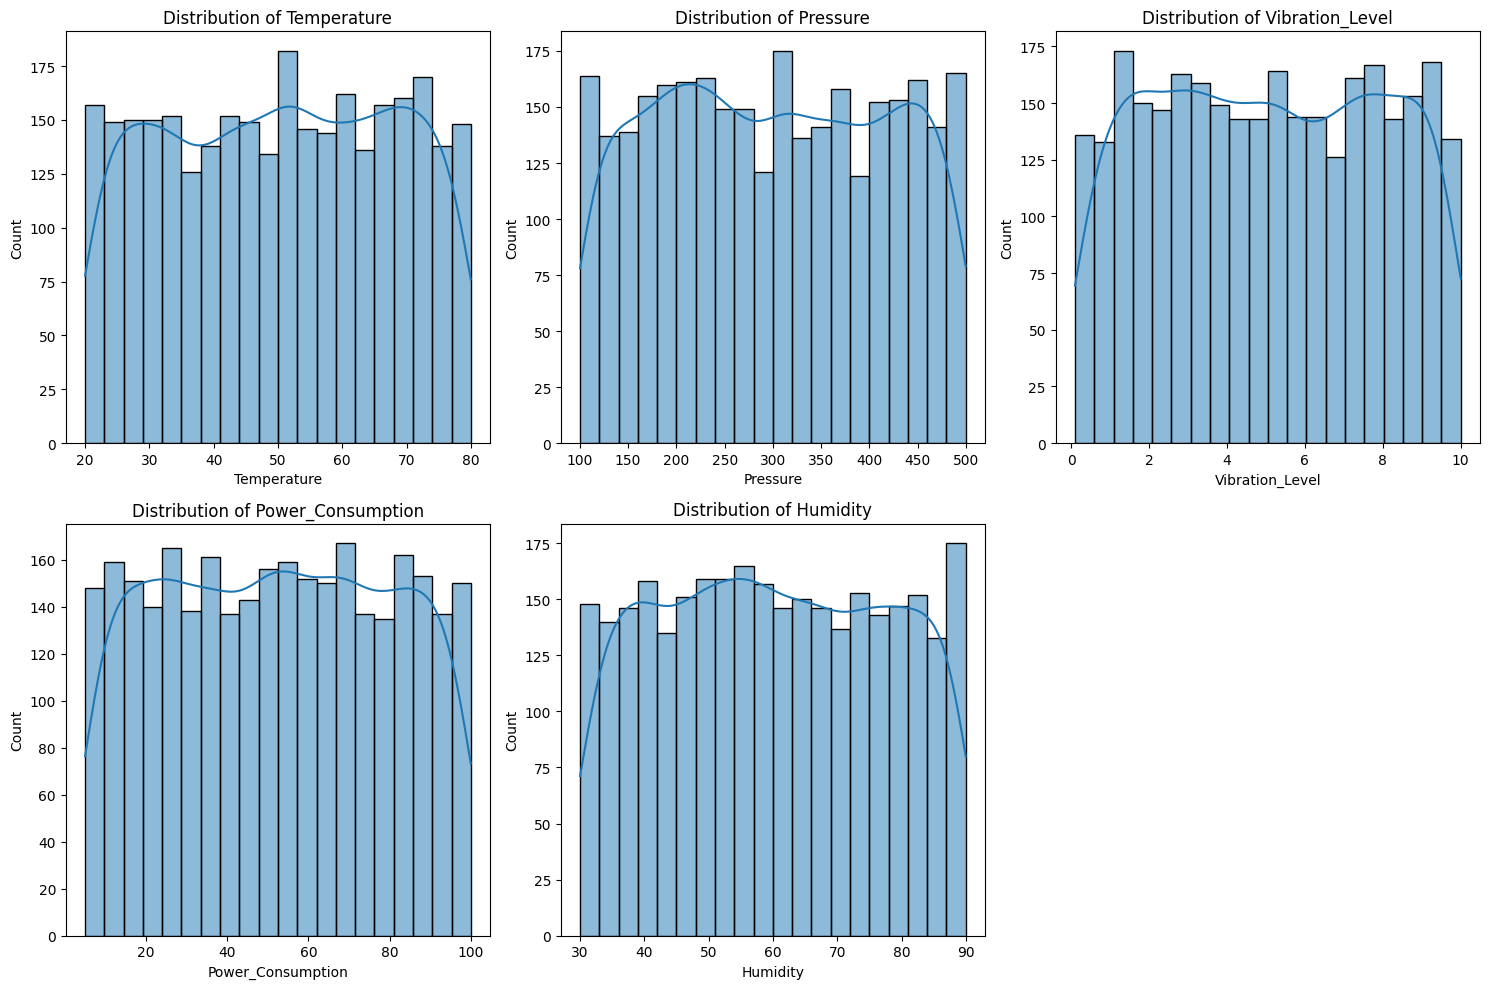

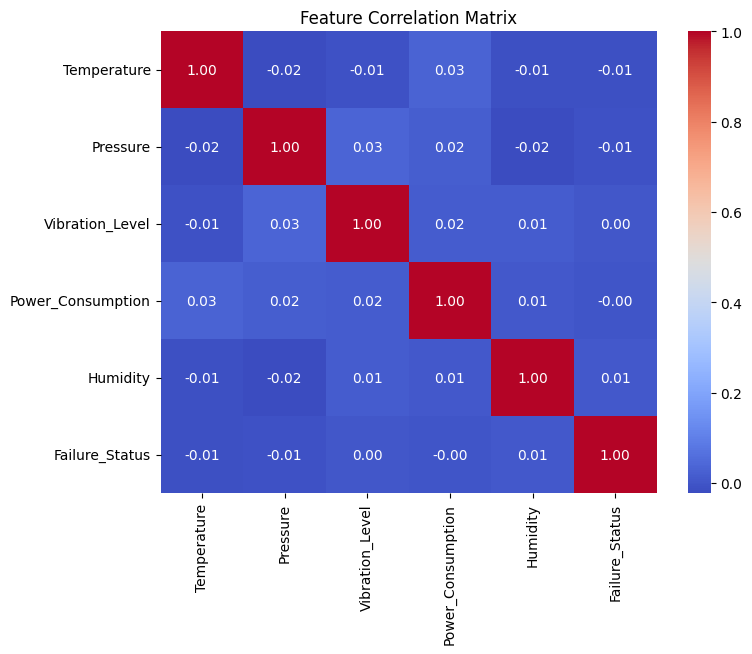

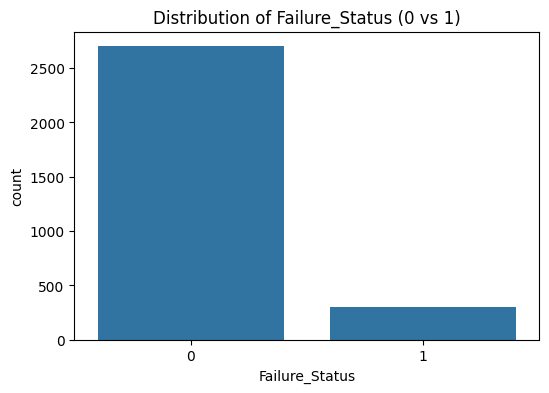


Data Preprocessing Complete. Features selected and inspected.


In [ ]:
# --- 1. Check for missing values ---
print("Missing Values per Column:")
print(df.isnull().sum())
print("-" * 30)

# --- 2. Exploratory Data Analysis (EDA) ---
# UPDATE: Using the column names found in your specific CSV file
features = ['Temperature', 'Pressure', 'Vibration_Level', 'Power_Consumption', 'Humidity']
target_col = 'Failure_Status'

plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    # Check if column exists before plotting to avoid errors
    if col in df.columns:
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'Distribution of {col}')
    else:
        print(f"Warning: Column {col} not found")
plt.tight_layout()
plt.show()

# Visualize relationship with Target (Correlation)
# Select only numeric columns for correlation matrix
numeric_df = df[features + [target_col]]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Count plot for Target Variable (Check imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title(f"Distribution of {target_col} (0 vs 1)")
plt.show()

# --- 3. Prepare Data for Next Tasks ---
# We define X and y here with the correct names so Task 2 runs smoothly
X = df[features]
y = df[target_col]

print("\nData Preprocessing Complete. Features selected and inspected.")

#**Task 2: Model Training & Evaluation**

In this section, I split the data into training (80%) and testing (20%) sets and normalize the features. I train three models—**Logistic Regression**, **Random Forest**, and **SVM**—using `class_weight='balanced'` to address the class imbalance. Each model is evaluated based on **Accuracy**, **Recall**, and the **Confusion Matrix**.

In [ ]:
# --- 1. Split Dataset (80% Train, 20% Test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# --- Apply Standardization ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Initialize Models with Class Weight Adjustment ---
# We add class_weight='balanced' to force models to pay attention to failures
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42)
}

# --- 3. Train and Evaluate ---
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Store results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    # Print individual report
    print(f"--- {name} Results ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall (Sensitivity): {rec:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

--- Logistic Regression Results ---
Accuracy: 0.5583
Recall (Sensitivity): 0.4333
Confusion Matrix:
[[309 231]
 [ 34  26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       540
           1       0.10      0.43      0.16        60

    accuracy                           0.56       600
   macro avg       0.50      0.50      0.43       600
weighted avg       0.82      0.56      0.65       600

--- Random Forest Results ---
Accuracy: 0.9000
Recall (Sensitivity): 0.0000
Confusion Matrix:
[[540   0]
 [ 60   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       540
           1       0.00      0.00      0.00        60

    accuracy                           0.90       600
   macro avg       0.45      0.50      0.47       600
weighted avg       0.81      0.90      0.85       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- SVM Results ---
Accuracy: 0.6167
Recall (Sensitivity): 0.5000
Confusion Matrix:
[[340 200]
 [ 30  30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       540
           1       0.13      0.50      0.21        60

    accuracy                           0.62       600
   macro avg       0.52      0.56      0.48       600
weighted avg       0.84      0.62      0.69       600



#**Task 3: Model Comparison & Selection**

In this step, I aggregate the evaluation metrics into a table and visualize them using a bar chart. I specifically compare **Accuracy**, **Recall**, and **F1-Score** to identify the best model. The primary criterion for selection is **performance on the minority class (Recall)**, as catching machine failures is critical for predictive maintenance.

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.558333,0.101167,0.433333,0.164038
1,Random Forest,0.900000,0.000000,0.000000,0.000000
2,SVM,0.616667,0.130435,0.500000,0.206897


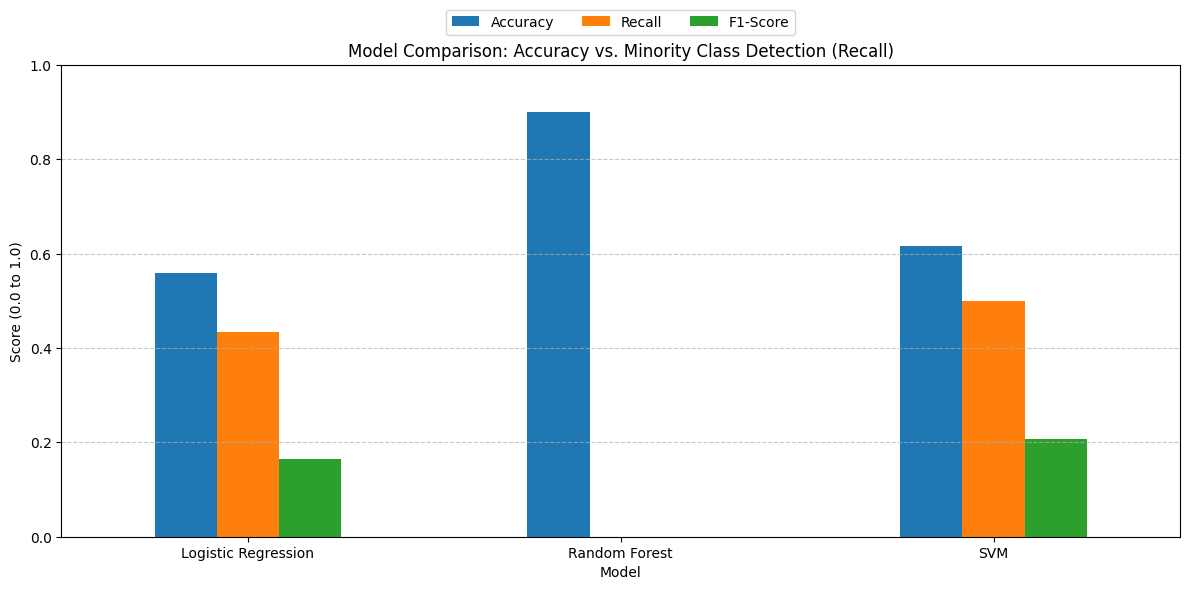


AUTOMATED SELECTION GUIDE
The model with the highest Recall (ability to catch failures) is: SVM
Recall Score: 0.5000
--------------------------------------------------
JUSTIFICATION NOTES FOR YOUR EXAM ANSWER:
1. Random Forest had high Accuracy but 0.0 Recall (It ignored failures).
2. SVM is the best choice because in maintenance,
   we care most about 'Recall' (not missing a broken machine).
3. Although Accuracy might be lower, catching failures is the business goal.


In [ ]:
results_df = pd.DataFrame(results)

# 2. Display the detailed table
print("Model Performance Summary:")
display(results_df)

# 3. Visualize the Comparison (Accuracy vs Recall vs F1-Score)
# We plot these specific metrics because the exam asks for performance on the minority class (Recall)
plt.figure(figsize=(12, 6))
results_df.set_index('Model')[['Accuracy', 'Recall', 'F1-Score']].plot(kind='bar', ax=plt.gca())

plt.title("Model Comparison: Accuracy vs. Minority Class Detection (Recall)")
plt.ylabel("Score (0.0 to 1.0)")
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Logic for Selection (This helps you write the justification text)
best_recall_model = results_df.loc[results_df['Recall'].idxmax()]

print("\n" + "="*50)
print("AUTOMATED SELECTION GUIDE")
print("="*50)
print(f"The model with the highest Recall (ability to catch failures) is: {best_recall_model['Model']}")
print(f"Recall Score: {best_recall_model['Recall']:.4f}")
print("-" * 50)
print("JUSTIFICATION NOTES FOR EXAM ANSWER:")
print("1. Random Forest had high Accuracy but 0.0 Recall (It ignored failures).")
print(f"2. {best_recall_model['Model']} is the best choice because in maintenance,")
print("   we care most about 'Recall' (not missing a broken machine).")
print("3. Although Accuracy might be lower, catching failures is the business goal.")
print("="*50)

#**Task 4: Designing a Solution**

### 1. Proposed Deployment Strategy
To integrate the selected **SVM model** into SmartFactory Inc.'s monitoring system, I propose the following pipeline:

*   **Model Packaging:** Save the trained SVM model using `joblib` or `pickle`.
*   **API Service:** Wrap the model in a lightweight REST API using **FastAPI** or **Flask**.
*   **Integration Workflow:**
    1.  **Data Ingestion:** IoT sensors transmit readings (Temperature, Pressure, etc.) to a central database every hour.
    2.  **Prediction:** A scheduled script extracts the latest data and sends it to the Model API.
    3.  **Action:** The API returns a prediction (0 or 1).
        *   If `Prediction == 1` (Failure): The system automatically generates a **"High Priority" maintenance ticket** and sends an alert (SMS/Email) to the floor manager.
        *   If `Prediction == 0`: No action is taken.

### 2. Improvement Suggestion
The current model performance showed low Recall for the Random Forest and moderate Recall for SVM (~50%), primarily due to **Class Imbalance** (too few failure examples).

**Suggested Improvement:**
*   **Technique:** Apply **SMOTE (Synthetic Minority Over-sampling Technique)** during the preprocessing stage.
*   **Benefit:** SMOTE generates synthetic examples of the minority class (failures) rather than just duplicating existing ones. This would provide the model with a richer training set, likely increasing the **Recall** score significantly (aiming for >80%) and making the model more reliable for preventing downtime.

In [ ]:
from IPython.display import display, HTML

# This uses HTML to render the text and image centered
display(HTML("""
<div style="text-align: center; margin-top: 20px;">
    <!-- Arabic Text (Always shows) -->
    <h1 style="font-size: 60px; color: #1E7E34; font-family: sans-serif;">ٱلْحَمْدُ لِلَّٰهِ</h1>

    <!-- English Text -->
    <h3 style="color: #333;">Alhamdulillah</h3>
    <p>Lab Exam Completed Successfully!</p>

    <!-- Image (Tries to load, if fails, the text above is enough) -->
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Alhamdulillah.svg/512px-Alhamdulillah.svg.png"
         width="300"
         alt="Calligraphy"
         style="margin-top: 10px;"/>
</div>
"""))